In [1]:
# Import Libs
import pandas as pd

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
# Import data
rice_df = pd.read_excel('rice_word2vec_3mer_dataset.xlsx')
maize_df = pd.read_excel('maize_word2vec_3mer_dataset.xlsx')

In [3]:
# Rice data + maize data
df = rice_df._append(maize_df, ignore_index = True)
df

,circName,stress,tissue,chr,start,end,strand,start_anno,wc_3mer_1,wc_3mer_2,...,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
0,osa-circ1-OS01T0723400,-,multipleTissue,1,30167620,30167771,+,"exon,CDS",-3.738741,8.954664,...,-25.198840,2.249939,-4.701558,-3.633969,5.212902,-6.579618,11.032136,-8.533007,-8.327910,18.141064
1,osa-circ2-OS03T0223400,-,multipleTissue,3,6461672,6462146,-,"exon,CDS",31.042567,37.664923,...,-27.264821,51.359450,-73.188428,-1.662928,56.565280,28.610637,80.878607,38.090248,-30.543510,28.859375
2,osa-circ3-OS11T0210300,-,multipleTissue,11,5715883,5716030,-,"exon,CDS",-31.307338,14.101101,...,-69.366830,1.113416,-42.689580,-6.150814,23.203639,-7.541412,-11.218056,-40.615067,16.391329,1.324206
3,osa-circ4-OS02T0200900,-,multipleTissue,2,5631023,5631244,-,"exon,CDS",15.773287,55.951050,...,42.391724,50.721551,-67.643923,-24.403869,41.171276,45.067768,9.704687,9.653121,7.829608,-11.254961
4,osa-circ5-OS05T0494800,-,multipleTissue,5,24302336,24302448,+,"exon,CDS",-44.379635,-33.514299,...,-75.243917,-36.308267,7.583992,-27.560256,-24.934966,-15.739278,9.237141,-16.380438,-18.462203,7.718794
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101828,zma-circ38781--,-,root,10,96969742,96969888,-,"exon,CDS",-13.972886,6.107950,...,98.429620,7.452953,-15.737801,35.920804,61.204687,48.885356,-12.690994,-36.205666,44.758745,-17.722664
101829,zma-circ38782--,-,leaf,4,244809483,244809674,-,intergenic,7.036017,-10.090989,...,24.790249,6.276686,-12.864078,-1.256257,42.178863,-4.007750,-10.729215,-5.812331,7.679475,-18.434670
101830,zma-circ38783--,-,shoot,1,38916899,38917325,+,intergenic,-18.672884,43.651235,...,172.084031,18.400802,-26.153603,36.820269,153.651124,101.715267,-52.398818,-47.916956,38.571516,-17.400118
101831,zma-circ38784--,-,root,1,205166872,205167268,-,intergenic,7.627427,-54.741109,...,87.106894,30.368255,-34.900771,53.611954,44.205673,-65.699111,30.057831,104.595740,81.229813,-104.068594


In [4]:
df_drought = df.query('stress == "-" or stress == "drought"').replace('-', 0).replace('drought', 1)

In [5]:
# Define X and y (target) variables
X = df_drought.drop(['circName','stress','tissue','chr','start','end','strand','start_anno'], axis=1)
y = df_drought['stress']

In [6]:
X.head(2)

,wc_3mer_1,wc_3mer_2,wc_3mer_3,wc_3mer_4,wc_3mer_5,wc_3mer_6,wc_3mer_7,wc_3mer_8,wc_3mer_9,wc_3mer_10,...,wc_3mer_55,wc_3mer_56,wc_3mer_57,wc_3mer_58,wc_3mer_59,wc_3mer_60,wc_3mer_61,wc_3mer_62,wc_3mer_63,wc_3mer_64
0,-3.738741,8.954664,0.703204,-7.427550,9.996643,-0.181532,18.598464,-34.975266,-1.800704,10.088900,...,-25.198840,2.249939,-4.701558,-3.633969,5.212902,-6.579618,11.032136,-8.533007,-8.32791,18.141064
1,31.042567,37.664923,95.821671,-13.835744,-44.356329,15.314592,45.651881,-14.309955,-16.547858,-11.756102,...,-27.264821,51.359450,-73.188428,-1.662928,56.565280,28.610637,80.878607,38.090248,-30.54351,28.859375


In [7]:
y.value_counts()

,count
stress,
0,70996
1,12030


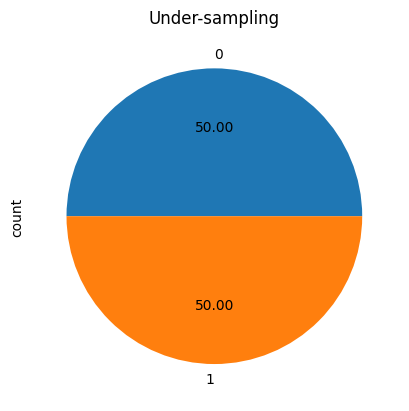

In [8]:
from imblearn.under_sampling import RandomUnderSampler

ros = RandomUnderSampler(sampling_strategy=1)

X_res, y_res = ros.fit_resample(X, y)

ax = y_res.value_counts().plot.pie(autopct='%.2f')
_ = ax.set_title("Under-sampling")

In [9]:
y_res.value_counts()


,count
stress,
0,12030
1,12030


In [10]:
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.20)

In [11]:
from sklearn.ensemble import RandomForestClassifier

modelrf = RandomForestClassifier()
modelrf.fit(X_train, y_train)

y_pred = modelrf.predict(X_test)
report = classification_report(y_test, y_pred)
print(report)

              precision    recall  f1-score   support

           0       0.90      0.74      0.82      2438
           1       0.78      0.92      0.84      2374

    accuracy                           0.83      4812
   macro avg       0.84      0.83      0.83      4812
weighted avg       0.84      0.83      0.83      4812



In [12]:
# Saving Random Forest Model
from joblib import dump

dump(modelrf, 'rf_model_drought.joblib')

['rf_model_drought.joblib']